In [9]:
%pylab inline
from __future__ import division
np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib



## Lady Tasting Tea


This is a famous example of R. A. Fisher.
A lady declares that by tasting a cup of tea made with milk 
she can discriminate whether
the milk or the tea infusion was first added to the cup.

<img src="https://dl.dropboxusercontent.com/u/2785709/brainder/2015/tastingtea/tea_cups.png">

### Experiment

- She is asked to taste eight cups, four of each type.

- She correctly identifies the type of 6 out of 8 cups.

- Do you think she can really tell the difference?


## A representation of the expriment

- Let her choices either `T` or `M`. She must make 8 choices, 4 of which will be `T` and
4 of which will be `M`.

- The true types of the tea are also `T` or `M`.

- Here is an example of how we might describe the experiment

In [10]:
lady = ['M', 'T', 'M', 'T', 'T', 'T', 'M', 'M']
truth = ['M', 'M', 'M', 'T', 'T', 'T', 'T', 'M']
number_correct = np.sum([l == t for l, t in zip(lady, truth)])
number_correct

6

## A mental model

- The variables `lady` and `truth` are just two outcomes for the experiment
in which the lady correctly identifies exactly 6 of the cups of tea.

- Is this unusual? How many other outcomes for her choices are there?

- How many other outcomes for her choices are there where she correctly identifies 6 or more?

### Permutations

- A *permutation* of a list is a reordering of the list.

- The set of all possible outcomes for `lady` is the set of all
reorderings of the list `lady`.

In [3]:
from itertools import permutations
[reordering for reordering in permutations(range(3))]

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

### Let us count the ways...

In [4]:
number_outcomes, exactly_six, six_or_more = 0, 0, 0
for lady_permuted in permutations(lady):
    number_outcomes += 1
    number_match = np.sum([l == t for l, t in zip(lady_permuted, truth)])
    exactly_six += (number_match == 6)
    six_or_more += (number_match >= 6)
    
number_outcomes, exactly_six, six_or_more

(40320, 9216, 9792)

### What if there was no difference between the cups of tea?

- If the lady could really tell no difference between the two,
then any one of 40320 possible outcomes for her choices should
reasonably be considered equally likely.

- There were 9792 such outcomes in which she would have 
correctly identified 6 or more.

- As the choices are equally likely, the chances that she would
correctly identify 6 or more are
$$
\frac{9792}{40320} \approx 24\%.
$$

- Not that rare an occurence. The chances she would correctly identify exactly 6 is about 23%!

#### Food for thought: why didn't we also permute the `truth`?

In [5]:
six_or_more / number_outcomes, exactly_six / number_outcomes

(0.24285714285714285, 0.22857142857142856)

## More data?

- The percentage of 75% seemed pretty impressive until we computed the chances
we would see such an impressive rate.

- What if she had correctly identified 60 out of 80 cups of tea?

- In this case, the number of reorderings is huge, about $10^{118}$!

- Our mental model is still valid: if the lady actually has no ability
to tell the difference between the two types of teas, then any of these
orderings is equally likely, whatever `truth` is.

- We can get a sense of how impressive this is by choosing several reorderings
at random and computing the number of matches.

In [14]:
lady = ['T']*40 + ['M']*40
truth = ['T']*40 + ['M']*40
lady[:10]

['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']

In [11]:
number_outcomes, exactly_sixty, sixty_or_more = 5000, 0, 0
matches = []
for _ in range(number_outcomes):
    lady_reordering = np.random.choice(lady, size=len(lady), replace=False)
    number_match = np.sum([l == t for l, t in zip(lady_reordering, truth)])
    exactly_sixty += (number_match == 60)
    sixty_or_more += (number_match >= 60)
    matches.append(number_match)
    
number_outcomes, exactly_sixty, sixty_or_more

(5000, 1, 1)

### Maybe she does know what she's doing...

- We would really have been impressed by a 75% rate if she had tasted 80 cups of tea!

- We saw 1 reorderings out of 5000 with a success rate of 75%.

- The probability 1/5000 might not be a great estimate of how likely she
would be to achieve a success rate of 75% or higher if she really could not
distinguish between the cups of tea.

- BUT, it certainly gives strong evidence that our mental model may be wrong...

### A visual summary

- Instead of just computing the chances above, we could record the number
of matches for each reordering of `lady` and produce a histogram.


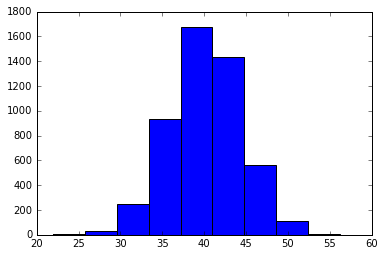

In [15]:
plt.hist(matches);

## The null hypothesis

- Our mental model above represents how we might model the experiment
under the assumption that the lady really cannot distinguish
between different the different types.

- In statistics, we call this the *null hypothesis*.

- The permutations above represented different outcomes for our experiment.

- Under our null hypothesis, each of these outcomes was equally likely. This allowed us to compute the chances that the lady would have such a success rate of 75% or higher if she really could not tell the difference (i.e. *assuming the null hypothesis was correct.*) 

- For 6/8, the chances were about 25%, we were not very impressed. If she had achieved 60/80, we really would have been impressed. In other words, *observing something rare under the null hypothesis is evidence against the null hypothesis.*

- This is the rationale in hypothesis tests.

# A second scenario

- [A/B testing](http://getdatadriven.com/ab-significance-test) is a tool used by companies to determine the effectiveness of different strategies to attract customers.

- Here is an [example](http://getdatadriven.com/ab-significance-test) found with an easy web search.

- A company tries two strategies: 
     * 1000 customers directed to page A, with 90 successful outcomes (i.e. clickthroughs).
     * 1000 customers directed to page B, with 120 successful outcomes (i.e. clickthroughs).

- Is there a difference between the strategies?



In [17]:
strategy_A = [0]*910 + [1]*90
strategy_B = [0]*880 + [1]*120

## Mental model

- Suppose that the 1000 customers in each arm are randomly sampled from some population. (*This assumption might not be true in practice! It is notoriously hard to obtain a random sample from a population...*)

- Suppose there is no difference between the two strategies. (*This is the null hypothesis in this example.*)

- Then, if we make one big data set of size 2000 with 210 successes and then randomly assign 1000 to `A` and the rest to `B` we will have outcomes that were as likely as the observed outcome.

- What summary should we use? A reasonable summary would seem to be the difference
between the successes between arms `A` and `B`.

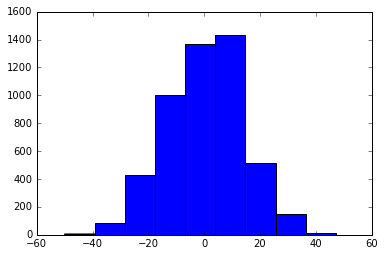

In [21]:
pooled = strategy_A + strategy_B
number_trial = 5000
difference = np.zeros(number_trial)

for i in range(number_trial):
    np.random.shuffle(pooled)
    outcome_A = pooled[:1000] # first 1000 entries are A
    outcome_B = pooled[1000:] # the rest are B
    difference[i] = np.sum(outcome_A) - np.sum(outcome_B)

difference = np.array(difference)
plt.hist(difference);

### What are the chances

We observed a difference with absolute value |120-90| = 30.


Out of our 5000 different reorderings, how often was the difference in the number of successes
greater than or equal to 30 (in absolute value)?

In [22]:
np.mean(difference >= 30)

0.0172

This is pretty unlikely. Maybe our null hypothesis is not true...

### What are the chances?

In [1]:
%%capture
normal_fig = plt.figure(figsize=stats60_figsize)
ax = normal_curve()
interval = np.linspace(-4,-2.2, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)
ax.set_title('The green area is %0.1f%%' % (100 * ndist.cdf(-2.2)), fontsize=20, color='green')


In [2]:
normal_fig

## $Z$-scores

- In this hypothesis test, the quantity
$$
Z = \frac{\text{observed} - \text{expected}}{\text{SE(observed)}}
$$
is called a **$z$-score**.

- The quantities **expected, SE(observed)** are computed **assuming the null hypothesis is true.**

- It measures how many standardiazed units the **observed** value is from what
is expected (if the null hypothesis were true).

## $P$-values

- The chances we computed are the chances, if the roulette game was fair, that we would observe a standardized less than our observed standardized value of  -2.2.
- In general, if we test a null hypothesis with some  observed data
  or  observed test statistic, the  $P$-value
   is the chance, assuming the null hypothesis is true, that we would observe such an extreme test statistic.
* When computing chances using a $z$ score, the test is called **$z$ tests.**
* **Note:**  $\bbox[5px,border:2px solid orange]{P-value}$ is random!


## More about $P$-values

* ** The P-value is NOT the chances that the null hypothesis is correct!**
  
* Why not?
     - The online roulette game is fair or it is not. The null hypothesis is true or it is false.
     - If the  $P$-value
         were the chances the null hypothesis is correct, these chances would be  random...
         
* In Bayesian statistics, one *can*
   compute the chances the null hypothesis is correct, but we have not addressed
   this methodology yet.
   
* The book uses two thresholds:
    - If the $P$-value is less than 5%, the result is *statistically significant*.
    - If the $P$-value is less than 1%, the result is called *highly significant*.

## A Bayesian calculation

- Suppose we declare, before seeing data: "the probability the success rate on  RED
   is 18/38 is 70%, and the probability the success rate on  RED
   is 12/38 is 30%".
- Call these two hypotheses $H_0, H_1$ and we have just said $P(\text{$H_0$ is true})=0.7, P(\text{$H_1$ is true}) = 0.3.$

- Suppose now, we observe 4 success from 20 bets but we
   do not know whether they were from the fair game, $H_0$ or
   the unfair game $H_1$.

- Bayes' rule says
   $$
   \begin{aligned}
   P(\text{$H_0$ is true} | \text{4 out of 20 successes})
   &= 
   \frac{0.7 \times \binom{20}{4} (\frac{18}{38})^4 (\frac{20}{38})^{16}}{0.7 \times \binom{20}{4} (\frac{18}{38})^4 (\frac{20}{38})^{16} + 0.3 \times \binom{20}{4} (\frac{12}{38})^4 (\frac{26}{38})^{16}} \\
   & \qquad = 15\%.
   \end{aligned}
   $$
  
- Are the chances above random or not random?


## A second testing scenario

* Suppose now we want to see the efficacy of a new drug on blood pressure.
* Our study design is: we will treat a large patient population with the drug and measure their blood pressure before and after taking the drug.
* One way to conclude that the drug is effective if the blood pressure has decreased. That is, if the average difference is negative.

## Setting up the test

* We could set this up as drawing from a box of *differences in blood pressure*.
* The *null hypothesis*, $H_0$ is: "the average difference is zero."
* The *alternative hypothesis*, $H_a$, is: "the average difference in the box is less than zero."
* Sometimes, people will test the alternative, $H_a$: "the average difference in the box is not zero."
* We test the null with observed data by estimating the average difference and converting to standardized units.

### Sample of blood pressures

In [3]:
BP = BloodPressure()


In [4]:
np.random.seed(0)
print BP.trial()
BP.figure

## Evaluating the test

- Our observed average is $-7.0$. We estimate its SE to be $4.5 / \sqrt{50} = 0.64$.
- In standardized units, our observed average converts to $$\frac{-7.0 - 0}{0.64}  \approx - 11$$
- The  $P$-value
   is 0: there is virtually no chance a standard normal would ever be so small. 

- We reject the null hypothesis $H_0$ and conclude $H_a$: "the average difference of the box is negative."

In [5]:
5.1 / sqrt(50)

## Example (continued)

* Suppose that our null hypothesis was different. We might have begun with the null hypothesis $H_0$: "the average decrease in blood pressure will be 7 mm Hg" with alternative $H_a$: "the average decrease in blood pressure is not 7mm Hg".
* How do we test this hypothesis?
* Well, under this null hypothesis our observed average converts to $$\frac{-7.0 -(- 7)}{0.64}  \approx 0$$

* This test is **two-sided**: we did not specify the alternative as greater than or larger than...

### What are the chances?

In [6]:
%%capture
normal_fig2 = plt.figure(figsize=stats60_figsize)
ax = normal_curve()
interval = np.linspace(-4,-0.6, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)
interval = np.linspace(0.6,4, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)

ax.set_title('The green area is %0.1f%%' % (2 * 100 * ndist.sf(0.6)), fontsize=20, color='green')



In [7]:
normal_fig2


Area is 55%, we cannot reject $H_0: \text{average(difference)}=-7$.

## How small should the chances be?

* In our examples so far, it has been fairly clear which of the null or alternative is more believable.
* In practice, we must decide a threshold at which to reject $H_0$.
This is the *size of the test.*
* A common choice is to use a threshold of 5%. We call this threshold the *level*
   or *size*
   of the test.
* The book declares a *$P$-value*
   of $5\%$ or less to be "significant", $1\%$ or less to be "highly significant."

## Rejection rule

* Knowing the null and alternative hypotheses and the size of the test, we can define a * rejection rule*.
* For example, if the size is 5%, and $$\begin{aligned}
       H_0 &= \text{average difference is 0 mm Hg} \\
       H_a &= \text{average difference is negative} \\
     \end{aligned}$$
* Then, we reject $H_0$ if our $z$ statistic is less than  -1.65.

### One sided test (alternative negative)

In [8]:
%%capture
normal_fig3 = plt.figure(figsize=stats60_figsize)
ax = normal_curve()
interval = np.linspace(-4,-1.65, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)
ax.set_title('The green area is %0.0f%%' % (100 * ndist.cdf(-1.65)), fontsize=20, color='green')


In [9]:
normal_fig3


 5% rejection rule
 when alternative is negative …

## Blood pressure continued

* Suppose the alternative is now $H_a$: "the average difference is not 0mm Hg".
* Do we reject $H_0$:"the average difference is 0mm Hg"?
* In standardized units, our observed average converts to $$\frac{-7.0 - 0}{0.64}  \approx - 11$$
* Now, -11 is extremely unlikely under $H_0$ but it is likely for values some values of the average difference under $H_a$.
* We reject this $H_0$ when the $z$-score is large in absolute value.

### Two sided test

In [10]:
%%capture
normal_fig4 = plt.figure(figsize=stats60_figsize)
ax = normal_curve()
interval = np.linspace(-4,-2, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)
interval = np.linspace(2,4, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)

ax.set_title('The green area is %0.0f%%' % (2 * 100 * ndist.cdf(-2)), fontsize=20, color='green')


In [11]:
normal_fig4


 5% rejection rule
 when alternative does not specify the sign (i.e. could be positive or negative...)

## Blood pressure again 

* Suppose the alternative is now $H_a$: "the average difference is positive".
* Do we reject $H_0$:"the average difference is 0mm Hg"?
* In standardized units, our observed average converts to $$\frac{-7.0 - 0}{0.64}  \approx - 11$$
* While -11 is extremely unlikely under $H_0$ it is even more unlikely under $H_a$.
* It seems reasonable to conclude that neither $H_0$ nor $H_a$ is true.
* But, to conclude $H_a$ is true, we should only reject this $H_0$ when the $z$-score is positive …

### One sided test (alternative positive)

In [12]:
%%capture
normal_fig5 = plt.figure(figsize=stats60_figsize)
ax = normal_curve()
interval = np.linspace(1.65,4, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='green', alpha=0.5)
ax.set_title('The green area is %0.0f%%' % (100 * ndist.sf(1.65)), fontsize=20, color='green')


In [13]:
normal_fig5


 5% rejection rule
 when alternative is positive …

## One-sided vs. two-sided

* If we want to conclude a one-sided alternative like $H_a$:"the average difference in blood pressure is less than -7 mm Hg".
* Then, we can take the null hypothesis to be $H_0$:"the average difference in blood pressure is greater than or equal to -7 mm Hg". We reject for $z$-scores that are negative and large in absolute value.
* On the other hand, if we want to conclude a two-sided alternative like $H_a$:"the average difference in blood pressure is not -7 mm Hg".
* Then, we can take the null hypothesis to be $H_0$:"the average difference in blood pressure is equal to -7 mm Hg". We reject for large $z$-scores in absolute value.


## Normal approximation and hypothesis tests

* If a normal approximation holds for $\bbox[5px,border:2px solid orange]{\widehat{\theta}}$
(i.e. $E(\widehat{\theta}) \approx \bbox[5px,border:2px solid blue]{\theta}$ and $\widehat{\theta}-\theta$ follows a normal curve with an SE we can approximate). 

* Then, we can test the null hypothesis $H_0:  \theta=\theta_0$ against $H_a:  \theta \neq \theta_0$ (or any variation of one-sided vs. two-sided).
* For instance, our first null hypothesis was $\theta_0=0$. In the second, $\theta_0=-7$.
* The test statistic, called a  $z$ score
   for testing $H_0: \theta=\theta_0$ is 
   $$z = \frac{\bbox[5px,border:2px solid orange]{\widehat{\theta}} - \bbox[5px,border:2px solid blue]{\theta_0}}{\text{SE}(\bbox[5px,border:2px solid orange]{\widehat{\theta}})}
   $$
   
* We call $z$ a $Z$-statistic or a $Z$-score.
* If $H_0$ is true, then $ z$ follows the standard normal curve.
* If $H_0$ is not true, then $z$ does not usually follow the standard normal curve. If it does, you have a very poor test.

## Normal approximation and hypothesis tests

* If $H_0$ is not true, then $Z$ does not usually follow the standard normal curve. If it does, you have a very poor test...
* It may follow a normal curve with mean $\neq 0$.
* The logic of the hypothesis test is as follows: if $H_0$ is true, then our observed test statistic should be a "typical value" under $H_0$.
* The  $P$-value
   depends on what $H_a$ is.
* It is often easier to use the rejection rule instead of the $P$-value.
* For null hypotheses like $H_0:\theta \leq \theta_0$ and $H_0:{ \theta \geq \theta_0}$ we use the rejection rules with the *same $z$-score* but whether we reject or not depends on whether the $z$-score is positive or negative.


### One sided test (alternative negative)

In [14]:
normal_fig3


 5% rejection rule
 for $H_0:\theta \geq \theta_0, H_a: \theta < \theta_0.$

### One sided test (alternative positive)

In [15]:
normal_fig5


 5% rejection rule
 for $H_0:\theta \leq \theta_0, H_a: \theta > \theta_0.$

### Two sided test

In [16]:
normal_fig4


 5% rejection rule
 for $ H_0: \theta = \theta_0, H_a: \theta \neq \theta_0.$

## Interpretation of 5% rejection rules

- Call the rejection rules 
$$
\begin{aligned}
R^+ &= [\theta_0 + 1.65 \cdot SE(\hat{\theta}), \infty) \\
R^- &= (-\infty, \theta_0 - 1.65 \cdot SE(\hat{\theta})] \\
R^{\pm} &= (-\infty, \theta_0 - 2 \cdot SE(\hat{\theta})] \cup [\theta_0 + 2 \cdot SE(\hat{\theta}), \infty)
\end{aligned}
$$
- So, $R^+$ corresponds to the pair $H_0: \theta \leq \theta_0, 
H_a: \theta > \theta_0$.
- The rejection rules are set up so that, for instance,
$$
\begin{aligned}
P(\hat{\theta} \in R^+) \leq 5\%, &\qquad \text{if $H_0: \theta \leq \theta_0$ is true.} \\
P(\hat{\theta} \in R^-) \leq 5\%, &\qquad \text{if $H_0: \theta \geq \theta_0$ is true.} \\
P(\hat{\theta} \in R^{\pm}) = 5\%, &\qquad \text{if $H_0: \theta = \theta_0$ is true.}
\end{aligned}
$$

- In other words, the rejection regions are set up so that there is less than a 5% chance of declaring a false positive.

- Here's an illustration of the $R^+$ rejection region. 

In [17]:
def Rplus(thetahat, theta0, SE_thetahat):
    return np.greater(thetahat, theta0 + 1.65 * SE_thetahat)
theta = Normal(2, 3)
thetahat = theta.trial()
thetahat, Rplus(thetahat, 2, 3), 2 + 1.65*3

Now, let's generate some data where $H_0$ is true.

In [18]:
Tsample = theta.sample(10000)
mean(Rplus(Tsample, 2, 3))

The null hypothesis is also true if the mean is below 2. Our `Zsample`
above has its estimate of $\hat{\theta}$ equal to 2.

If we look at the rejection rate for $\theta_0=4$, it should still be less than 5%.

In [19]:
mean(Rplus(Tsample, 4, 3))

## One-sided vs. two-sided

- The book often reports the one-sided $P$ values. 
- There is no problem with this, in principle, UNLESS you choose
$H_0$ (or, respectively $H_a$) AFTER seeing the $Z$ score.
- Most examples in the book (and solutions) seem to do this.
- The problem with this is that the 5% above roughly doubles to 10% 
so you are declaring more false positives than you think...
- Let's also define the test for $R^-$ and see what happens
when we decide which test to use after snooping at the sign of the data.

In [20]:
def Rminus(thetahat, theta0, SE_thetahat):
    return np.less(thetahat, theta0 - 1.65 * SE_thetahat)
mean(Rminus(Tsample, 2, 3))

In [21]:
def snooping_test(thetahat, theta0, SD_thetahat):
    test_pos = np.greater(thetahat, theta0) * Rplus(thetahat, theta0, SD_thetahat)
    test_neg = np.less(thetahat, theta0) * Rminus(thetahat, theta0, SD_thetahat)
    return test_pos + test_neg

mean(snooping_test(Tsample, 2, 3))

## Relation between hypothesis tests and confidence intervals

* Which values are reasonable?
* Well, -7.0 is certainly a reasonable value if the true average difference were -7 because our $z$ score would be 0.
* Hence, we would not reject $H_0$:"the average difference is -7" if we observed a sample average of -7
* The set of all values $\theta$ we would not reject $H_0$: "the average difference is $\theta$" at level 5% is basically the standard 95% confidence interval!
* Therefore, one can test $H_0:$"the average difference is 0" by checking to see whether 0 is in the confidence interval.

## Testing fairness via a confidence interval

- Let's go back to our roulette example. Suppose we make an additional 10 bets
and won 3 more times, making a total of 13 successes in 30 bets.
- An approximate 95% confidence for the true  RED
   success rate (fair or not) based on our 20 bets is $$ \frac{13}{30} \pm 2 * \sqrt{\frac{13}{30} \times \frac{17}{30} \frac{1}{30}} =  0.43 \pm 0.18$$
      
- (This assumes the online roulette game is doing independent trials, thought not necessarily fair trials)
- The success rate for  RED
   in the fair model is ${ 18/38 \approx 0.47}$.
- We see that 0.47 is within our 95% confidence interval. Therefore, we would not reject $H_0$:"the roulette table is fair" at level 5%.
* **Note:** we should ensure that we have enough trials so the normal approximation holds. 

## Tests and confidence intervals for small samples

* Our tests (and confidence intervals) have so far relied on normal approximations (i.e. we have used A-104 to compute all chances).
* If the sample size is small, the normal approximations may not be very good.
* If the sample size is small, we can sometimes get good confidence intervals using something called a $T$ statistic.
* The formula for the $T$ statistic is almost identical to the $z$ statistic, it is the *chances*
   that can be quite different.

## Tests and confidence intervals for small samples

* Suppose the Gauss model holds 

           measurement = true value + chance error

* **And, the histogram of the error box is not too different from a normal probability histogram or curve!**
  
* Then, there are very good confidence intervals even for very small samples.
* If the histogram of the error box is exactly a normal probability histogram, then these tests and confidence intervals are *exact*.

## The $T$ statistic

* Suppose we observed only 5 blood pressure changes: [-4,-6,-8,-2,-1].
* The average is -4.2 mm Hg, and the SD of the list is 2.6 mm Hg.
* Our usual $z$ score to test $H_0$: average difference $\geq 0$ against $H_a$: average difference $<0$ $${ z = \frac{-4.2}{2.6 / \sqrt{5}} \approx -3.7}$$
* The $T$ statistic replaces the SD of the list with SD$^+$ of the list which is 2.9 mm Hg. 
* The $T$ statistic is $${ \bbox[5px,border:2px solid orange]{ T} = \frac{-4.2}{2.9 / \sqrt{5}} \approx -3.3}$$

## What’s different about the $T$ statistic?

* For one thing, it uses $\text{SD}^+$ instead of $\text{SD}$.
* Why does it use $\text{SD}^+$?
* For small samples, $\text{SD}^+$ it is a better estimate of SD(box) than SD.
* Unfortunately, though, the $T$ statistic does not follow the normal curve. This is the biggest difference.

## Computing the chances for the $T$ test

* It *almost*
   follows the normal curve. For large samples, it gets closer and closer.
* For each sample size, there is a different curve, or probability histogram.
* These curves are indexed by what we call *degrees of freedom*.
* In this example, the degrees of freedom are $n-1$.

### Student’s $T$

In [22]:
%%capture
df=4
normal_fig6 = plt.figure(figsize=stats60_figsize)
ax = normal_fig6.gca()
normal_curve(ax=ax, label='Normal', color='blue', alpha=0.)
studentT_curve(ax=ax, label='$T_{%d}$' % df, color='green', alpha=0., df=df)
ax.set_title('Comparison of normal curve to $T_{%d}$' % df, fontsize=15)
ax.legend()

In [23]:
normal_fig6

### Student’s $T$

In [24]:
%%capture
df = 4 
normal_fig7 = plt.figure(figsize=stats60_figsize)
ax = normal_curve(alpha=0., color='blue')
interval = np.linspace(-4,ndist.ppf(0.025), 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='blue', alpha=0.5)
interval = np.linspace(ndist.ppf(0.975),4, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='blue', alpha=0.5)

studentT_curve(ax=ax, alpha=0., color='green', df=df)
interval = np.linspace(-4,tdist.ppf(0.025, df), 101)
ax.fill_between(interval, 0*interval, tdist.pdf(interval, df),
                hatch='+', color='green', alpha=0.2)
interval = np.linspace(tdist.ppf(0.975, df),4, 101)
ax.fill_between(interval, 0*interval, tdist.pdf(interval, df),
                hatch='+', color='green', alpha=0.2)



In [25]:
normal_fig7


Comparison of two-sided  5% rejection rule
, df=4

### Student’s $T$

In [26]:
%%capture
df=20
normal_fig8 = plt.figure(figsize=stats60_figsize)
ax = normal_fig8.gca()
normal_curve(ax=ax, label='Normal', color='blue', alpha=0.)
studentT_curve(ax=ax, label='$T_{%d}$' % df, color='green', alpha=0., df=df)
ax.set_title('Comparison of normal curve to $T_{%d}$' % df, fontsize=15)
ax.legend()



In [27]:
normal_fig8


Comparison with normal curve, degrees of freedom = 20

### Student’s $T$

In [28]:
%%capture
df = 20
normal_fig9 = plt.figure(figsize=stats60_figsize)
ax = normal_curve(alpha=0., color='blue')
interval = np.linspace(-4,ndist.ppf(0.025), 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='blue', alpha=0.5)
interval = np.linspace(ndist.ppf(0.975),4, 101)
ax.fill_between(interval, 0*interval, ndist.pdf(interval),
                hatch='+', color='blue', alpha=0.5)

studentT_curve(ax=ax, alpha=0., color='green', df=df)
interval = np.linspace(-4,tdist.ppf(0.025, df), 101)
ax.fill_between(interval, 0*interval, tdist.pdf(interval, df),
                hatch='+', color='green', alpha=0.2)
interval = np.linspace(tdist.ppf(0.975, df),4, 101)
ax.fill_between(interval, 0*interval, tdist.pdf(interval, df),
                hatch='+', color='green', alpha=0.2)



In [29]:
normal_fig9


Comparison of two-sided  5% rejection rule
, df=20